In [4]:
import pandas as pd
import matplotlib.pyplot as plt
mobileDf = pd.read_csv("Mobile Reviews Sentiment.csv")

Text(0, 0.5, 'Average Rating')

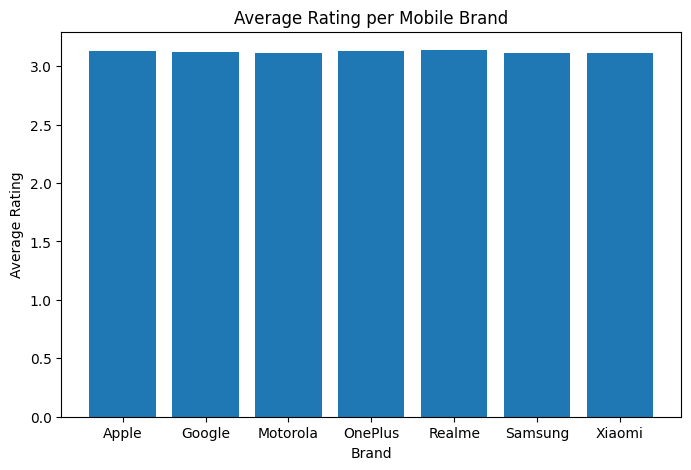

In [5]:
averageRating = mobileDf.groupby("brand")["rating"].mean()
fig , ax = plt.subplots(figsize=(8,5))
ax.bar(averageRating.index, averageRating.values)
ax.set_title("Average Rating per Mobile Brand")
ax.set_xlabel("Brand")
ax.set_ylabel("Average Rating")

Text(0, 0.5, 'Average Price(USD)')

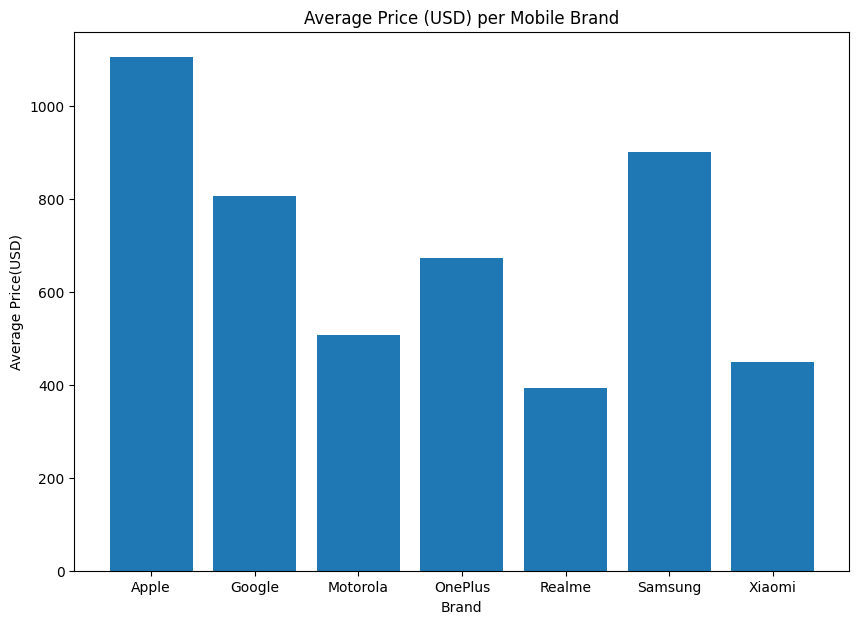

In [ ]:
averagePrice = mobileDf.groupby("brand")["price_usd"].mean()
fig , ax = plt.subplots(figsize=(10,7))
ax.bar(averagePrice.index, averagePrice.values)
ax.set_title("Average Price (USD) per Mobile Brand")
ax.set_xlabel("Brand")
ax.set_ylabel("Average Price(USD)")

Text(0.5, 1.0, 'Sentiment Distribution')

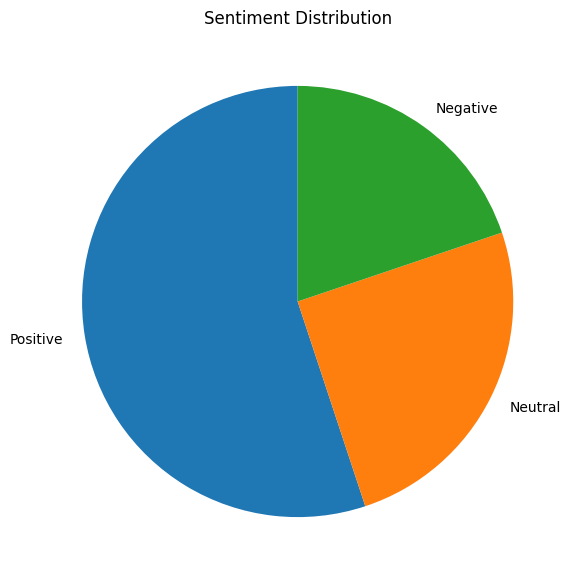

In [7]:
sentiment = mobileDf["sentiment"].value_counts()
fig , ax = plt.subplots(figsize=(7,7))
ax.pie(sentiment, labels=sentiment.index, startangle=90)
ax.set_title("Sentiment Distribution")

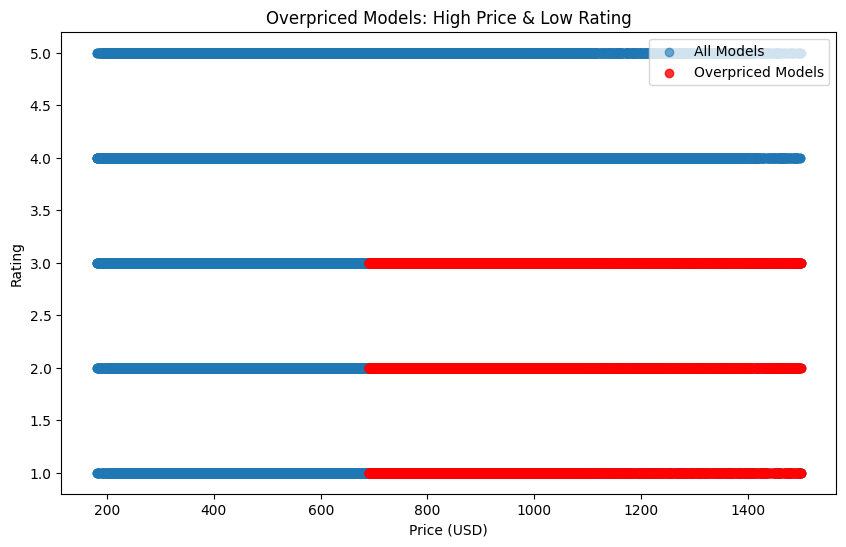

In [8]:
priceMean = mobileDf['price_usd'].mean()
ratingMean = mobileDf['rating'].mean()
overpriced_models = mobileDf[(mobileDf['price_usd'] > priceMean) & (mobileDf['rating'] < ratingMean)]
fig , ax = plt.subplots(figsize=(10,6))
ax.scatter(mobileDf['price_usd'] , mobileDf['rating'] , alpha=0.6 , label='All Models')
ax.scatter(overpriced_models['price_usd'] , overpriced_models['rating'] , color='red' , label='Overpriced Models' , alpha=0.8)
ax.set_xlabel('Price (USD)')
ax.set_ylabel('Rating')
ax.set_title('Overpriced Models: High Price & Low Rating')
ax.legend()

<Figure size 800x600 with 0 Axes>

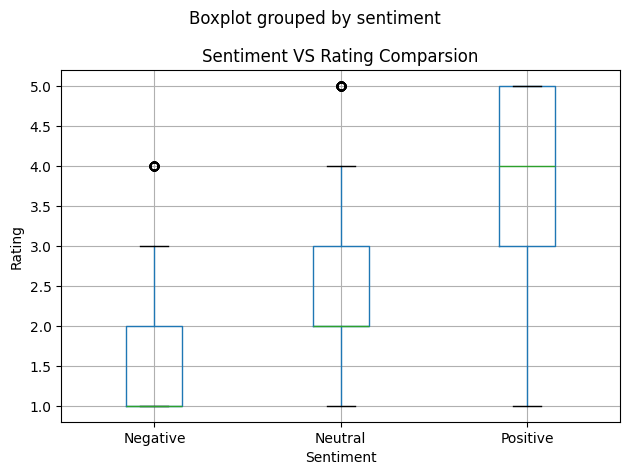

In [9]:
plt.figure(figsize=(8,6))
mobileDf.boxplot(column="rating" , by="sentiment")
plt.title("Sentiment VS Rating Comparsion")
plt.xlabel("Sentiment")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

In [10]:
softwareHouseDf = pd.read_csv("Software houses PK .csv")
softwareHouseDf["Services"] = softwareHouseDf["Services"].fillna("-")
softwareHouseDf.columns

Index(['Company Name', 'City', 'Address', 'Contact No', 'Services'], dtype='object')

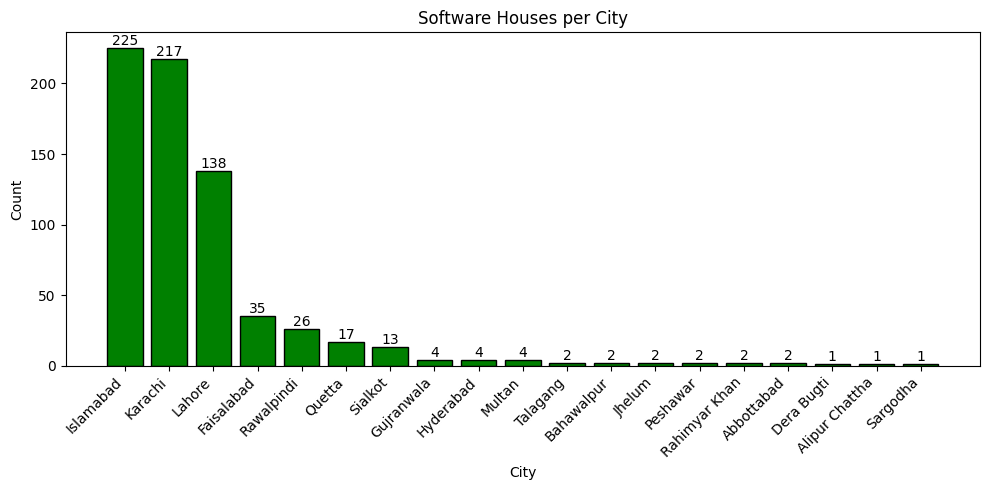

In [11]:
cityCounts = softwareHouseDf["City"].value_counts()
fig , ax = plt.subplots(figsize=(10,5))
bars = ax.bar(cityCounts.index , cityCounts.values , color='green' , edgecolor='black')
ax.set_title("Software Houses per City")
ax.set_xlabel("City")
ax.set_ylabel("Count")
plt.xticks(rotation=45 , ha='right')
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2. , height + 0.05 , f'{int(height)}' , ha="center" , va='bottom')
plt.tight_layout()
plt.show()

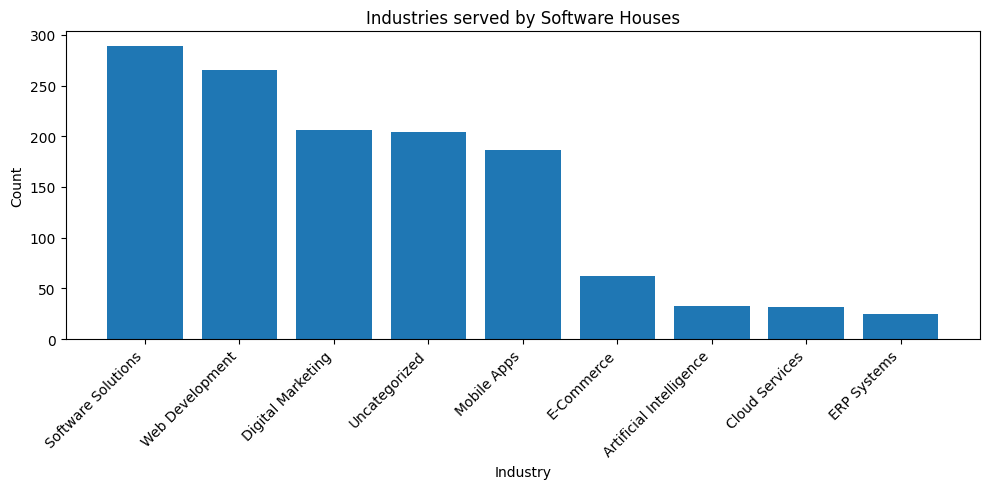

In [12]:
industryKeyWords = {
    "web": "Web Development",
    "app": "Mobile Apps",
    "android": "Mobile Apps",
    "ios": "Mobile Apps",
    "ai": "Artificial Intelligence",
    "machine learning": "Artificial Intelligence",
    "ml": "Artificial Intelligence",
    "ecommerce": "E-Commerce",
    "e-commerce": "E-Commerce",
    "marketing": "Digital Marketing",
    "seo": "Digital Marketing",
    "cloud": "Cloud Services",
    "software": "Software Solutions",
    "erp": "ERP Systems"
}
def get_industrues(text):
    text= text.lower()
    found = [v for k , v in industryKeyWords.items() if k in text]
    return found if found else ["Uncategorized"]
softwareHouseDf["Industries"] = softwareHouseDf["Services"].apply(get_industrues)
industryDf = softwareHouseDf.explode("Industries")
industryCounts = industryDf["Industries"].value_counts()
fig , ax = plt.subplots(figsize=(10,5))
ax.bar(industryCounts.index , industryCounts.values)
ax.set_title("Industries served by Software Houses")
ax.set_xlabel("Industry")
ax.set_ylabel("Count")
plt.xticks(rotation=45 , ha="right")
plt.tight_layout()

Text(0, 0.5, 'Count')

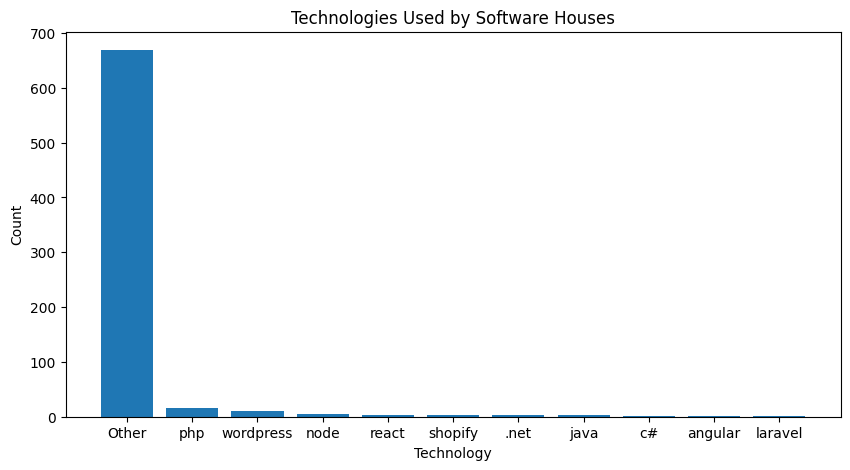

In [13]:
techKeyWords = [
    "php","python","django","flask","node","react","angular","vue",
    "java","c#",".net","wordpress","shopify","laravel","swift","kotlin"]
def extractTech(text):
    text = text.lower()
    return [t for t in techKeyWords if t in text] or ["Other"]
softwareHouseDf["Technologies"] = softwareHouseDf["Services"].apply(extractTech)
techDf = softwareHouseDf.explode("Technologies")
techCounts = techDf["Technologies"].value_counts()
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(techCounts.index , techCounts.values)
ax.set_title("Technologies Used by Software Houses")
ax.set_xlabel("Technology")
ax.set_ylabel("Count")

Text(0, 0.5, 'Frequency')

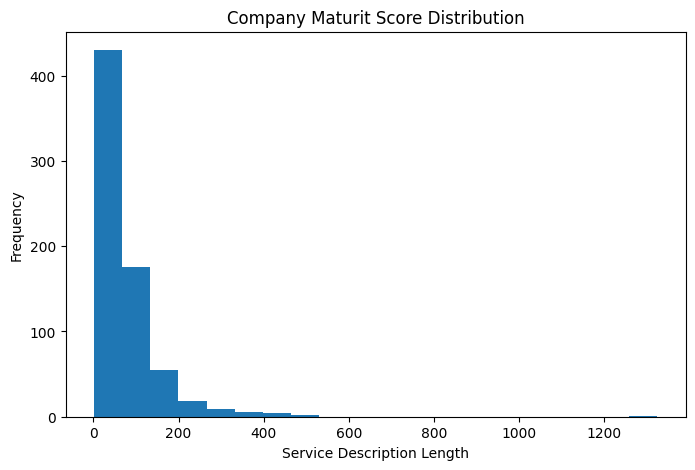

In [14]:
softwareHouseDf["MaturityScore"] = softwareHouseDf['Services'].apply(lambda x : len(str(x)))
fig , ax = plt.subplots(figsize=(8,5))
ax.hist(softwareHouseDf["MaturityScore"] , bins=20)
ax.set_title("Company Maturit Score Distribution")
ax.set_xlabel("Service Description Length")
ax.set_ylabel("Frequency")

In [15]:
softwareHouseDf["ServiceCount"] = softwareHouseDf["Services"].apply(lambda x : len(str(x).split(",")))
top10 = softwareHouseDf.sort_values("ServiceCount" , ascending=False)[["Company Name" , "ServiceCount" , "City" , "Services"]].head(10)
print(top10.to_string(index=False))

                               Company Name  ServiceCount       City                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    